In [14]:
import os
import pandas as pd

In [15]:
df = pd.read_csv(os.path.join("data","CZ_RADIO_TOP_100_tydenni.csv"))
wikid = pd.read_json(os.path.join("wikidata","wikidata.json"))
df = df.merge(wikid, on="interpret_hlavni", how="outer")

In [16]:
df.columns

Index(['Unnamed: 0', 'hitparada', 'rok', 'tyden', 'week', 'pozice', 'track',
       'interpret', 'interpret_hlavni', 'vydavatel', 'id', 'stazeno',
       'nazev_wiki', 'popis_en', 'popis_cs', 'velikost', 'zanry',
       'datum_narozeni', 'datum_umrti', 'zacatek_pusobeni', 'konec_pusobeni',
       'zalozeni', 'zanik', 'gender', 'misto_puvodu', 'zeme_puvodu',
       'obcanstvi', 'etnicita', 'hlas', 'nastroje', 'oceneni', 'nabozenstvi',
       'orientace', 'spotify_id', 'spotify_odberatele'],
      dtype='object')

In [17]:
df[df['velikost'] == 'člověk']['datum_narozeni'].drop_duplicates()

0        1958.0
414      1972.0
737      1974.0
1456     1980.0
2063     1969.0
          ...  
91053    1934.0
91085    1954.0
91089    1950.0
91130    1956.0
91205    1936.0
Name: datum_narozeni, Length: 73, dtype: float64

In [18]:
df['vek'] = df['rok'] - df['datum_narozeni']

<Axes: xlabel='rok'>

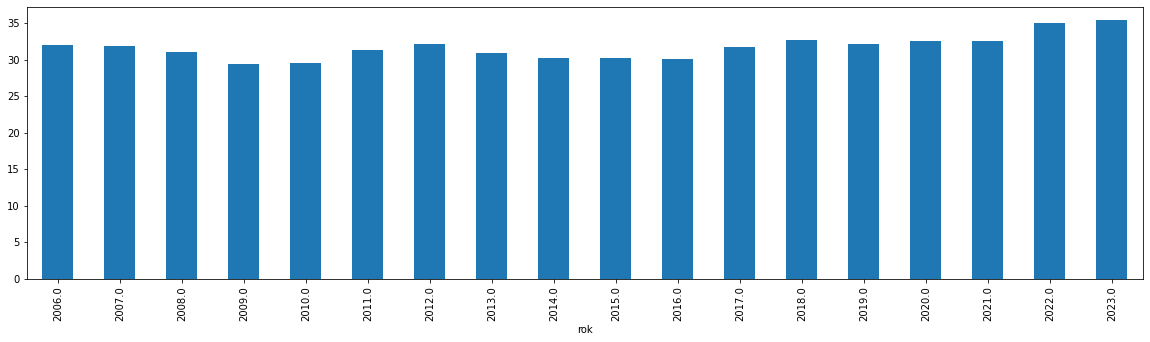

In [19]:
df.groupby('rok')['vek'].mean().plot.bar(figsize=(20,5))

<Axes: xlabel='rok'>

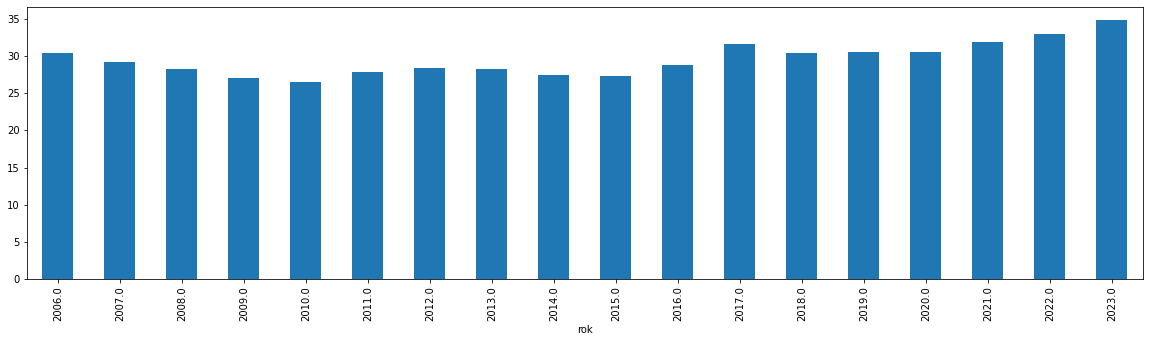

In [20]:
df[df['gender'] == 'žena'].groupby('rok')['vek'].mean().plot.bar(figsize=(20,5))

<Axes: xlabel='rok'>

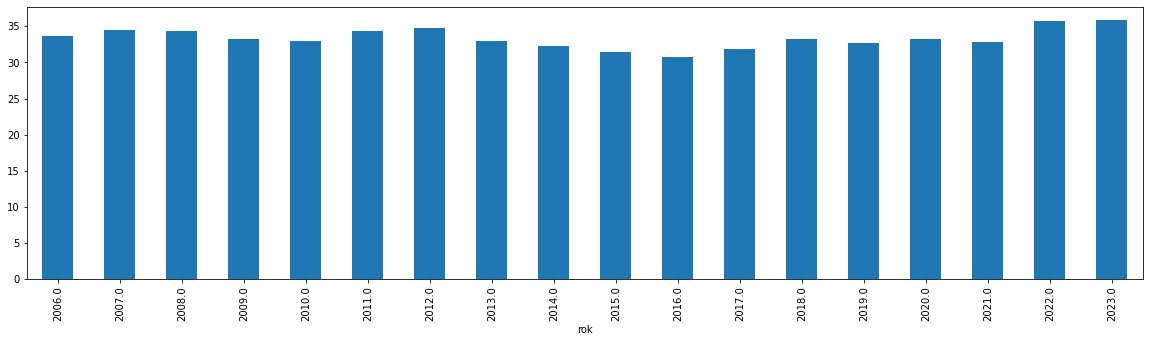

In [21]:
df[df['gender'] == 'muž'].groupby('rok')['vek'].mean().plot.bar(figsize=(20,5))

In [22]:
pro_histogram = df[(df['datum_umrti'].isnull()) | (df['datum_umrti'] >= df['rok'])]
pro_histogram = df[['gender','rok','vek','interpret_hlavni']].drop_duplicates()

<Axes: ylabel='Frequency'>

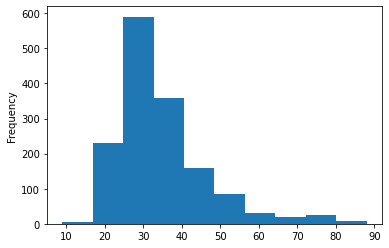

In [23]:
pro_histogram[pro_histogram['gender'] == 'muž']['vek'].plot.hist()

In [24]:
df[df['gender'] == 'muž'][['interpret_hlavni','vek']].drop_duplicates().dropna().sort_values(by='vek')

,interpret_hlavni,vek
43629,Dj Scotty,9.0
46158,Dj Gollum,10.0
43631,Dj Scotty,10.0
61125,Adam Mišík,16.0
73328,Shawn Mendes,17.0
...,...,...
43796,Karel Gott,82.0
58718,John Lennon,82.0
43834,Karel Gott,83.0
43873,Karel Gott,84.0


<Axes: ylabel='Frequency'>

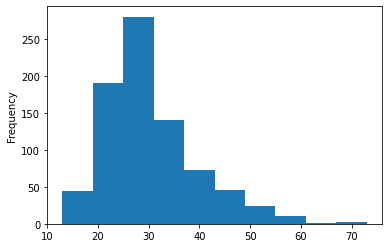

In [25]:
pro_histogram[pro_histogram['gender'] == 'žena']['vek'].plot.hist()

In [26]:
df[df['gender'] == 'žena'][['interpret_hlavni','vek']].drop_duplicates().dropna().sort_values(by='vek')

,interpret_hlavni,vek
22854,Ewa Farna,13.0
82313,Grace Vanderwaal,14.0
22870,Ewa Farna,14.0
74191,Jasmine Thompson,15.0
22920,Ewa Farna,15.0
...,...,...
24499,Helena Vondráčková,59.0
24502,Helena Vondráčková,60.0
54703,Hana Zagorová,65.0
61470,Zagorová,67.0
